In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import expand, I, im, symbols, re

import correlator as corr

In [2]:
eps = symbols('eps')

In [3]:
mass_1, mass_2, mass_3 = 1, 2, 3

In [37]:
beta = 10

In [22]:
p1 = [0, 0, 0, 0]
p2 = [0, 0, 0, 0]

In [42]:
n_range = np.array([n for n in range(-10, 11)])

In [43]:
corr_finite_temp_data = np.array([corr.finite_temp_term(p1, p2, mass_1, mass_2, mass_3, beta, n) for n in n_range])

In [44]:
Gamma_finite_temp_data = np.array([expand(I*ftd).subs('eps', 0) for ftd in corr_finite_temp_data])
Gamma_finite_temp_data_re = np.array([re(x) for x in Gamma_finite_temp_data])
Gamma_finite_temp_data_im = np.array([im(x) for x in Gamma_finite_temp_data])

In [45]:
Gamma_finite_temp_data_re

array([3.40022889064285291e-6, 4.50124290152753605e-6,
       6.10847742953759171e-6, 8.52895315290015340e-6,
       0.0000123001117052274635, 0.0000183854846229225858,
       0.0000285179872103672903, 0.0000456395498767070027,
       0.0000735189500504309030, 0.000110789947420074451,
       0.000132629300321475581, 0.000110789947420074451,
       0.0000735189500504309030, 0.0000456395498767070027,
       0.0000285179872103672903, 0.0000183854846229225858,
       0.0000123001117052274635, 8.52895315290015340e-6,
       6.10847742953759171e-6, 4.50124290152753605e-6,
       3.40022889064285291e-6], dtype=object)

Text(0, 0.5, '$\\mathrm{Re}\\Gamma\\times 10^5$')

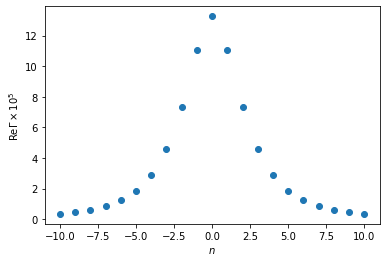

In [49]:
fig, ax = plt.subplots()
ax.scatter(n_range, 1e5*Gamma_finite_temp_data_re)
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\mathrm{Re}\Gamma\times 10^5$')